# Ejercicio de regresión logística

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt', header=None, names=['exam_1', 'exam_2','Admitted'])
data.head()

,exam_1,exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


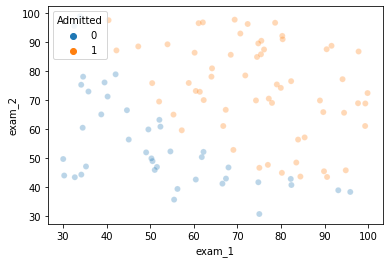

In [ ]:
sns.scatterplot(x='exam_1', y='exam_2', hue='Admitted', alpha =0.3, data=data)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

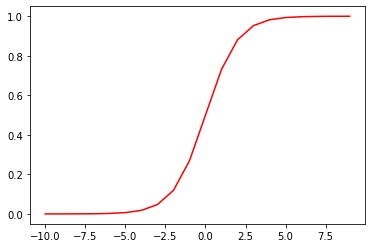

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
X = data[['exam_1', 'exam_2']]
y = data[['Admitted']]
logmodel.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Persona con buenas notas
X_new = pd.DataFrame({'exam_1': [80], 
                      'exam_2': [80]})
preds = logmodel.predict_proba(X_new)
preds[:,1]

array([0.99940295])

In [ ]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [ ]:
#
X_new_2 = pd.DataFrame({'exam_1': [60], 
                      'exam_2': [60]})
preds_2 = logmodel.predict_proba(X_new_2)
preds_2[:,1]

array([0.3327285])

In [ ]:
# Nueva columna
data['type'] = 'train'

#
obs_1 = pd.DataFrame({'exam_1': [80], 'exam_2': [80], 'Admitted': preds[:,1], 'type': "test"})
obs_2 = pd.DataFrame({'exam_1': [60], 'exam_2': [60], 'Admitted': preds_2[:,1], 'type': "test"})

# 
print(obs_1)
print(obs_2)

   exam_1  exam_2  Admitted  type
0      80      80  0.999403  test
   exam_1  exam_2  Admitted  type
0      60      60  0.332728  test


In [ ]:
data_total = pd.concat([data,obs_1, obs_2])

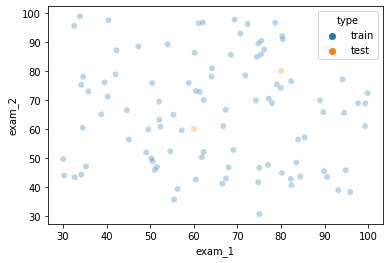

In [ ]:
# first, plot the observed data
sns.scatterplot(x='exam_1', y='exam_2', hue='type', alpha =0.3, data=data_total)

In [ ]:
data_total

,exam_1,exam_2,Admitted,type
0,34.623660,78.024693,0.000000,train
1,30.286711,43.894998,0.000000,train
2,35.847409,72.902198,0.000000,train
3,60.182599,86.308552,1.000000,train
4,79.032736,75.344376,1.000000,train
...,...,...,...,...
97,99.315009,68.775409,1.000000,train
98,55.340018,64.931938,1.000000,train
99,74.775893,89.529813,1.000000,train
0,80.000000,80.000000,0.999403,test


In [ ]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [ ]:
b_0 = logmodel.intercept_
b_1 = logmodel.coef_[0][0]
b_2 = logmodel.coef_[0][1]
print(b_0, b_1, b_2)

[-25.05219314] 0.20535491218577978 0.20058380395530143


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Estudiante 1
print(1/(1+np.exp(-(b_0 + b_1 *80 + b_2*80))))
# Estudiante 2
print(1/(1+np.exp(-(b_0 + b_1 *60 + b_2*60))))

[0.99940295]
[0.3327285]


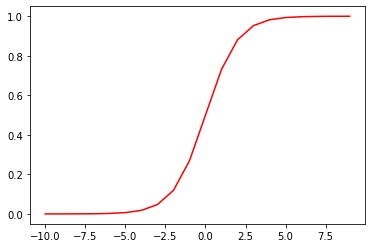

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

## Visión Estadística

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fit = smf.glm('Admitted ~ exam_1 + exam_2', 
              data=data, 
              family=sm.families.Binomial(link=sm.families.links.logit)).fit()
# No es necesario especificar logit en la anterior función

print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Admitted   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.350
Date:                Thu, 09 Sep 2021   Deviance:                       40.700
Time:                        19:02:05   Pearson chi2:                     44.0
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.1613      5.799     -4.339      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until



- Intercept, es el valor cuando las demás variables son 0

- Exam_i, valor en cuanto mejora la probabilidad de ser admitido por cada punto de examen

In [ ]:
data.head()

,exam_1,exam_2,Admitted,exam_total
0,34.623660,78.024693,0,112.648352
1,30.286711,43.894998,0,74.181708
2,35.847409,72.902198,0,108.749607
3,60.182599,86.308552,1,146.491151
4,79.032736,75.344376,1,154.377112


In [ ]:
data_3_cols = data[['Admitted','exam_1','exam_2']]
pd.melt(data_3_cols, id_vars=[('Admitted')])

,Admitted,variable,value
0,0,exam_1,34.623660
1,0,exam_1,30.286711
2,0,exam_1,35.847409
3,1,exam_1,60.182599
4,1,exam_1,79.032736
...,...,...,...
195,1,exam_2,48.380286
196,1,exam_2,87.103851
197,1,exam_2,68.775409
198,1,exam_2,64.931938


In [ ]:
data_melted = pd.melt(data[['Admitted','exam_1','exam_2']], id_vars=[('Admitted')])
data_melted

,Admitted,variable,value
0,0,exam_1,34.623660
1,0,exam_1,30.286711
2,0,exam_1,35.847409
3,1,exam_1,60.182599
4,1,exam_1,79.032736
...,...,...,...
195,1,exam_2,48.380286
196,1,exam_2,87.103851
197,1,exam_2,68.775409
198,1,exam_2,64.931938


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


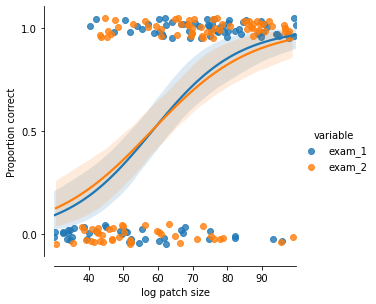

In [ ]:
sns.lmplot('value', 'Admitted', data=data_melted,
           hue='variable',
           #col='observer',
           logistic=True,
           y_jitter=.05,
           size=4)
sns.despine(offset=10)
#g.fig.subplots_adjust(wspace=0.5)
plt.xlabel('log patch size')
plt.ylabel('Proportion correct')
plt.yticks([0, 0.5, 1]);

# Ejercicio

- Crea una columna, Sum exam 1 y sum exam 2
- Ajusta un modelo logístico
- Comprueba el resultado con el gráfico anterior

In [ ]:
# Data
data = pd.read_csv('https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt', header=None, names=['exam_1', 'exam_2','Admitted'])

# (...)


,exam_1,exam_2,Admitted,exam_total
0,34.623660,78.024693,0,112.648352
1,30.286711,43.894998,0,74.181708
2,35.847409,72.902198,0,108.749607
3,60.182599,86.308552,1,146.491151
4,79.032736,75.344376,1,154.377112


In [ ]:
# Ajusta un modelo logistico sobre examen


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Admitted   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.369
Date:                Thu, 09 Sep 2021   Deviance:                       40.738
Time:                        19:29:31   Pearson chi2:                     43.4
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.2097      5.798     -4.348      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


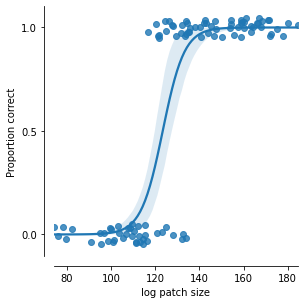

In [ ]:
### Explora el gráfico anterior

#g.fig.subplots_adjust(wspace=0.5)


In [ ]:
# Realiza predicciones para 100, 110, 120, 130... visualiza como cambia la probabilidad#



0    0.00832
dtype: float64
0    0.060779
dtype: float64
0    0.332943
dtype: float64
0    0.793802
dtype: float64
0    0.967419
dtype: float64
0    0.995652
dtype: float64
0    0.999434
dtype: float64
0    0.999927
dtype: float64


In [ ]:
# Comprueba que siempre se predice un valor entre 0 y 1. 
## Realiza predicciones para -200 y 5000

0    2.028445e-29
dtype: float64


0    1.0
dtype: float64
